In [3]:
#Import packages
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import requests
from scipy import stats
from scipy.stats import mstats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Imputer
from sklearn.metrics import explained_variance_score, r2_score
from sklearn import decomposition
from sklearn.cluster import KMeans
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [4]:
#Retrieve the cleaned dataset
salary1_file=(r'C:\Users\abrah\Documents\Capstone project\finaldataset.csv')
pd.read_csv(salary1_file)
salary=pd.read_csv(salary1_file)

In [5]:
#To examine the descriptive statistics of NBA salaries in the dataset
salary.describe()

,Unnamed: 0,G,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,Salary,ORB/G,DRB/G,TRB/G,AST/G,STL/G,BLK/G,TOV/G,PF/G,PTS/G
count,411.00000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,...,4.110000e+02,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,260.59854,58.829684,13.735523,0.539540,0.309567,0.268129,4.984428,15.239173,10.105109,13.357421,...,7.575374e+06,0.904629,2.965873,3.870502,2.003814,0.686948,0.425143,1.196213,1.804352,9.325121
std,149.29201,21.789463,5.107112,0.066021,0.203709,0.159722,4.055475,6.269986,4.731096,9.216920,...,7.645738e+06,0.780689,1.815363,2.460470,1.826678,0.405063,0.412050,0.794911,0.695322,6.096052
min,0.00000,2.000000,-2.100000,0.184000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.444444
25%,131.50000,46.000000,10.400000,0.509500,0.147500,0.169000,2.000000,10.550000,6.350000,6.750000,...,1.605960e+06,0.355787,1.724014,2.142025,0.819347,0.412917,0.153846,0.642581,1.349061,5.111455
50%,265.00000,66.000000,13.100000,0.542000,0.324000,0.237000,3.600000,14.100000,8.900000,10.300000,...,4.187599e+06,0.647059,2.616438,3.266667,1.405405,0.617647,0.313433,1.013333,1.810811,7.784615
75%,384.50000,76.000000,16.450000,0.578000,0.447500,0.334500,7.250000,18.950000,13.100000,17.650000,...,1.191250e+07,1.235638,3.760597,5.067835,2.600000,0.912662,0.512989,1.586420,2.282692,12.631291
max,516.00000,82.000000,30.800000,0.799000,0.842000,1.500000,26.300000,36.300000,25.300000,57.300000,...,3.468255e+07,4.259259,10.324675,14.129870,11.185185,2.026316,2.641975,5.728395,3.861111,31.580247


In [6]:
#Descriptive statistic for "Salary" column
salary['Salary'].describe()

count    4.110000e+02
mean     7.575374e+06
std      7.645738e+06
min      2.500000e+04
25%      1.605960e+06
50%      4.187599e+06
75%      1.191250e+07
max      3.468255e+07
Name: Salary, dtype: float64

In [7]:
print(salary.shape)

(411, 46)


In [8]:
#Below are the full list of the column names
print(salary.columns)

Index(['Unnamed: 0', 'Player Name', 'G', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'Salary',
       'ORB/G', 'DRB/G', 'TRB/G', 'AST/G', 'STL/G', 'BLK/G', 'TOV/G', 'PF/G',
       'PTS/G'],
      dtype='object')


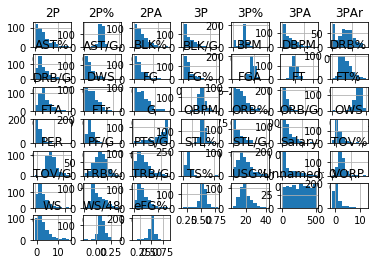

In [9]:
#Histogram
salary.hist()
plt.show()

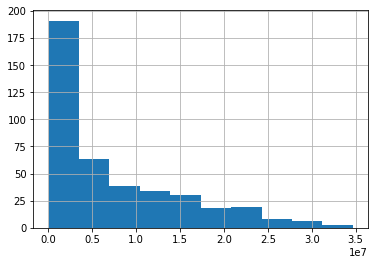

In [10]:
salary['Salary'].hist()
plt.show()

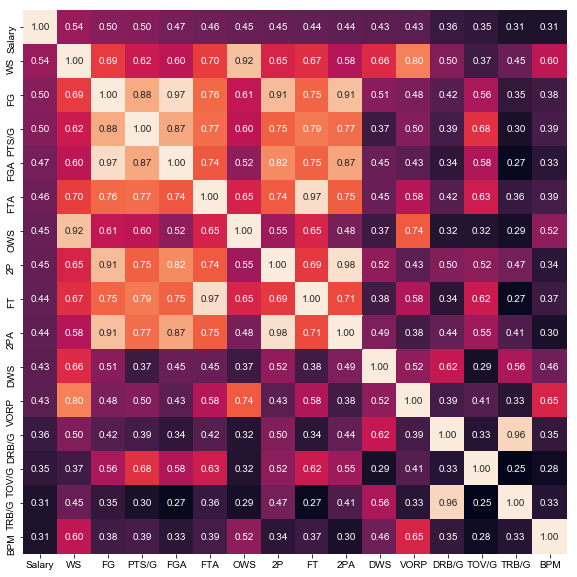

In [11]:
#Pearson correlation

corrmat = salary.corr(method='pearson', min_periods=1)
r_square = corrmat ** 2
k = 16
cols = r_square.nlargest(k, 'Salary')['Salary'].index
cm = salary[cols].corr()
cm_square = cm ** 2
f, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm_square, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [12]:
#Multicollinearity analysis
attribute=salary[['WS', 'FG', 'PTS/G', 'FGA', 'FTA', 'OWS', '2P', 'FT', '2PA', 'DWS', 'VORP', 'DRB/G', 'TOV/G', 'TRB/G', 'BPM']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(attribute.values, i) for i in range(attribute.shape[1])]
vif["attribute"] = attribute.columns
vif.round(1)

,VIF Factor,attribute
0,7856.6,WS
1,2550.2,FG
2,52.9,PTS/G
3,1606.0,FGA
4,170.4,FTA
5,3186.2,OWS
6,1421.5,2P
7,193.1,FT
8,888.5,2PA
9,1393.4,DWS


In [14]:
#Multicollinearity analysis
attribute2=salary[['WS', 'PTS/G', 'DRB/G', 'BPM']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(attribute2.values, i) for i in range(attribute2.shape[1])]
vif["attribute"] = attribute2.columns
vif.round(1)

,VIF Factor,attribute
0,9.0,WS
1,7.9,PTS/G
2,5.9,DRB/G
3,1.6,BPM


In [15]:
#The Attributes 'WS', 'PTS/G', 'DRB/G'and 'BPM' have VIF factors below 10